# 🧠 Unsupervised Learning 
## 🎯 Problem Statement

 - The dataset contains extensive transactional records with minimal prior labeling, making it challenging to understand inherent patterns or relationships among data points.

 - The primary goal is to explore and uncover natural groupings or structures within the data using clustering techniques, without relying on predefined categories.

 - By applying unsupervised learning, the project aims to identify hidden patterns, similarities, and anomalies that can provide deeper insights into customer behavior and operational trends.

 - The outcome is expected to support data-driven decision-making—enabling segmentation, trend detection, and strategic planning across business or analytical functions.


## 📘 What is Unsupervised Learning?
Unsupervised Learning is a machine learning technique that finds patterns in **unlabeled data**. It aims to discover the **hidden structure** of data without predefined outputs.

---

## 🔍 Supervised vs. Unsupervised

| Feature          | Supervised Learning       | Unsupervised Learning     |
|------------------|----------------------------|----------------------------|
| Data             | Labeled                   | Unlabeled                 |
| Goal             | Predict labels/values     | Find patterns/clusters    |
| Examples         | Classification, Regression| Clustering, PCA, t-SNE    |
| Evaluation       | Easy (accuracy, etc.)     | Hard (subjective)         |

---

## 📂 Main Types

### 1. Clustering
Group similar data points.
- **K-Means** – Partitions data into *k* clusters.
- **Hierarchical** – Tree-like cluster hierarchy.
- **DBSCAN** – Based on density (good for noise detection).

```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)


## 2. Dimensionality Reduction

Dimensionality Reduction aims to reduce the number of input features while preserving as much meaningful information as possible.

- **PCA (Principal Component Analysis)** – A **linear** technique that transforms data into components which capture the **maximum variance**.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)** – A **nonlinear** technique that preserves **local structure**, making it especially useful for **visualizing high-dimensional data**.


## 🌍 Applications

- **Customer Segmentation** (Retail)  
- **Anomaly Detection** (Cybersecurity)  
- **Recommender Systems** (E-commerce)  
- **Topic Modeling** (NLP)  
- **Genomics** (Bioinformatics)

---

## ⚠️ Challenges

- No ground truth → hard evaluation  
- Choosing number of clusters (`k`)  
- Sensitive to feature scaling  
- Interpretability can be low

---

## ✅ Real-World Examples

| Domain      | Use Case                      |
|-------------|-------------------------------|
| Retail      | Segmenting customers          |
| Banking     | Detecting fraud/anomalies     |
| Healthcare  | Grouping patient symptoms     |
| NLP         | Discovering topics in text    |

---

## 🏁 Summary

Unsupervised learning is crucial for exploring and understanding unknown data.  
It enables pattern discovery without prior knowledge and is foundational in data science pipelines.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#Summary statistics for categorical variables
#count count the number of rows .T transform the table and show the object
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
#Summary statistics for categorical variables
#count count the number of rows .T transform the table and show the object
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [6]:
#check for missing values
missing_data = df.isna().sum()
missing_data / len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

## Handling missing values

In [7]:
#dropping the missing values drop na will go to check the na value in the row and drop them, while drop only will drop the whole column
df = df.dropna(subset=['Description', 'CustomerID'])

In [8]:
#check for missing values
missing_data = df.isna().sum()
missing_data / len(df)*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [9]:
#Finding the duplicate rows(keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

#sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

#Displaying the first 10  records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [10]:
#Dropping duplicate
df.duplicated().sum()

5225

In [11]:
df= df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(401604, 8)

In [14]:
df.sample(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
519707,580162,22555,PLASTERS IN TIN STRONGMAN,2,12/2/2011 10:52,1.65,12856.0,United Kingdom
478808,577106,84012,MAGIC SHEEP WOOL GROWING FROM PAPER,2,11/17/2011 17:18,0.85,14456.0,United Kingdom
200392,554131,22919,HERB MARKER MINT,12,5/23/2011 9:43,0.65,13988.0,United Kingdom
411939,572241,21481,FAWN BLUE HOT WATER BOTTLE,4,10/21/2011 15:20,3.75,12712.0,Germany
413616,572317,22736,RIBBON REEL MAKING SNOWMEN,1,10/23/2011 16:13,1.65,14629.0,United Kingdom
228783,556954,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,8,6/16/2011 8:38,2.95,15585.0,United Kingdom
165465,550802,22383,LUNCH BAG SUKI DESIGN,10,4/20/2011 15:21,1.65,17120.0,United Kingdom
276733,561073,23082,SET 6 PAPER TABLE LANTERN HEARTS,24,7/24/2011 15:46,3.75,13408.0,United Kingdom
441692,574624,23531,WALL ART BIG LOVE,2,11/6/2011 11:20,6.95,17769.0,United Kingdom
242092,558315,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,9,6/28/2011 11:44,2.55,15065.0,United Kingdom


In [15]:
#creating new column transaction status to filter cancelled and completed transaction
import numpy as np
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

#Analyzing cancelled transaction
cancelled_transactions = df[df["Transaction_Status"]=='Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1).T

,count,mean,std,min,25%,50%,75%,max
Quantity,8872.0,-30.774910,1172.249902,-80995.00,-6.00,-2.00,-1.00,-1.0
UnitPrice,8872.0,18.899512,445.190864,0.01,1.45,2.95,4.95,38970.0


In [16]:
#calculating cancelled transaction in percentage
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
cancelled_percentage

2.209141343213713

<span style="color: blue; font-weight: bold; font-size: 20pt;">Step 4.1</span> | <span style="color: red; font-weight: bold; font-size: 20pt;">RFM Features</span>

In [17]:
#converting invoice column to date data type from object dtype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#extracting only date from the invoice date column without the time we only need the date to the new col invoice day
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01


In [18]:
most_recent_date = df['InvoiceDay'].max
most_recent_date()

datetime.date(2011, 12, 9)

In [19]:
# checking the recent date
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()
most_recent_data = df['InvoiceDay'].max()

customer_data['InvoiceDay']= pd.to_datetime(customer_data['InvoiceDay'])
most_recent_data = pd.to_datetime(most_recent_data)

customer_data['Days_Since_Last_Purchase'] = (most_recent_data - customer_data['InvoiceDay']).dt.days
customer_data.drop(columns=['InvoiceDay'], inplace=True)


In [20]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


<span style="color: blue; font-weight: bold; font-size: 20pt;">Step 4.1.2</span> | <span style="color: red; font-weight: bold; font-size: 20pt;">Frequency (F)</span>

In [21]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [22]:
# Checking for TOal transactions
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns = {'InvoiceNo':'Total_Transactions'}, inplace=True)
total_transactions.head()

,CustomerID,Total_Transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [23]:
# Checking for Total transactions
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns = {'InvoiceNo':'Total_Transactions'}, inplace=True)

total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns = {'Quantity':'Total_Product_Purchased'}, inplace=True)

total_products_purchased.head(), total_transactions.head()

(   CustomerID  Total_Product_Purchased
 0     12346.0                        0
 1     12347.0                     2458
 2     12348.0                     2341
 3     12349.0                      631
 4     12350.0                      197,
    CustomerID  Total_Transactions
 0     12346.0                   2
 1     12347.0                   7
 2     12348.0                   4
 3     12349.0                   1
 4     12350.0                   1)

In [24]:
# Checking for Total transactions
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns = {'InvoiceNo':'Total_Transactions'}, inplace=True)

total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns = {'Quantity':'Total_Product_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2341
3,12349.0,18,1,631
4,12350.0,310,1,197


<span style="color: blue; font-weight: bold; font-size: 20pt;">Step 4.1.3</span> | <span style="color: red; font-weight: bold; font-size: 20pt;">Monetary (M)</span>

In [25]:
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

total_spend.head()

,CustomerID,Total_Spend
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [26]:
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2341,1797.24,449.310000
3,12349.0,18,1,631,1757.55,1757.550000
4,12350.0,310,1,197,334.40,334.400000


<span style="color: orange; font-weight: bold; font-size: 20pt;">Step 4.2</span> | <span style="color: red; font-weight: bold; font-size: 20pt;">Product Diversity</span>

In [27]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns ={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2341,1797.24,449.310000,22
3,12349.0,18,1,631,1757.55,1757.550000,73
4,12350.0,310,1,197,334.40,334.400000,17


<span style="color: orange; font-weight: bold; font-size: 20pt;">Step 4.3</span> | <span style="color: red; font-weight: bold; font-size: 20pt;">Behavioral Features</span>

In [28]:
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay,Total_Spend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8


In [30]:
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y:y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

C:\Users\Wills Michael\AppData\Local\Temp\ipykernel_16544\303734363.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y:y.days))


In [31]:
average_days_between_purchases.head()

,CustomerID,Average_Days_Between_Purchases
0,12346.0,0.000000
1,12347.0,2.016575
2,12348.0,9.433333
3,12349.0,0.000000
4,12350.0,0.000000


In [32]:
# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16


<span style="color: violet; font-weight: bold; font-size: 20pt;">Step 4.4</span> | <span style="color: red; font-weight: bold; font-size: 20pt;">Geographic Features</span>

In [33]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.888258
Germany           0.023605
France            0.021103
EIRE              0.018613
Spain             0.006295
Name: proportion, dtype: float64

In [34]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0


In [35]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3874
0     419
Name: count, dtype: int64

<span style="color: violet; font-weight: bold; font-size: 20pt;">Step 4.5</span> | <span style="color: red; font-weight: bold; font-size: 20pt;"> Cancellation Insights </span>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

- _Cancellation Frequency_: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

    
- _Cancellation Rate_: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.

In [36]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customers_data dataframe
customer_data.head()

C:\Users\Wills Michael\AppData\Local\Temp\ipykernel_16544\111561862.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Cancellation_Frequency'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0,0.0
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0,0.0


<span style="color: violet; font-weight: bold; font-size: 20pt;">Step 4.6</span> | <span style="color: red; font-weight: bold; font-size: 20pt;"> Seasonality & Trends </span>

In [37]:
import numpy as np

# Array a: 10 identical elements (no variation)
a = np.array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

# Array b: 5 elements with different values, same mean
b = np.array([4000, 4500, 5000, 5500, 6000])  # Mean = 5000

# Calculate means and standard deviations
mean_a = np.mean(a)
std_a = np.std(a)

mean_b = np.mean(b)
std_b = np.std(b)

In [38]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

,CustomerID,Year,Month,Total_Spend
0,12346.0,2011,1,0.00
1,12347.0,2010,12,711.79
2,12347.0,2011,1,475.39
3,12347.0,2011,4,636.25
4,12347.0,2011,6,382.52
...,...,...,...,...
13670,18283.0,2011,10,112.99
13671,18283.0,2011,11,637.71
13672,18283.0,2011,12,208.00
13673,18287.0,2011,5,765.28


In [39]:
from scipy.stats import linregress
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0
# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

C:\Users\Wills Michael\AppData\Local\Temp\ipykernel_16544\3667318524.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0,0.0,449.310000,301.159918,-160.884000
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0,0.0,1757.550000,0.000000,0.000000
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0,0.0,334.400000,0.000000,0.000000


In [40]:
customer_data.dtypes

CustomerID                        float64
Days_Since_Last_Purchase            int64
Total_Transactions                  int64
Total_Product_Purchased             int64
Total_Spend                       float64
Average_Transaction_Value         float64
Unique_Products_Purchased           int64
Average_Days_Between_Purchases    float64
Day_Of_Week                         int32
Hour                                int32
Is_UK                               int64
Cancellation_Frequency            float64
Cancellation_Rate                 float64
Monthly_Spending_Mean             float64
Monthly_Spending_Std              float64
Spending_Trend                    float64
dtype: object

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.384566,-0.334919,-0.240788,-0.232359,-0.919014,-0.714653,-0.298536,1,-1.074012,1,0.071031,0.087870,-0.553559,-0.287074,0.054884
1,12347.0,-0.882452,0.196618,0.281118,0.287622,0.861102,0.474121,-0.123416,1,0.658207,0,-0.393103,-0.335727,0.207580,0.219412,0.064404
2,12348.0,-0.144085,-0.122304,0.256275,-0.015531,0.380004,-0.469905,0.520656,3,2.823481,0,-0.393103,-0.335727,0.001873,0.160145,-0.286530
3,12349.0,-0.720618,-0.441227,-0.106808,-0.020319,4.162308,0.124482,-0.298536,0,-1.507067,0,-0.393103,-0.335727,1.619103,-0.287074,0.054884
4,12350.0,2.232847,-0.441227,-0.198959,-0.192015,0.047783,-0.528179,-0.298536,2,1.524317,0,-0.393103,-0.335727,-0.140178,-0.287074,0.054884


In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

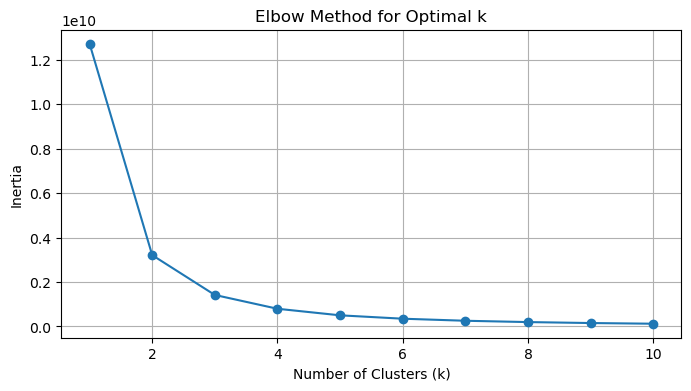

In [44]:
# Apply the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=123)
labels = kmeans.fit_predict(customer_data_scaled)

score = silhouette_score(customer_data_scaled, labels)
print(f"Silhouette Score for k=4: {score:.4f}")

Silhouette Score for k=4: 0.5712


In [46]:
customer_data['Cluster'] = labels

In [47]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Cluster
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071,1
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0,0.0,449.310000,301.159918,-160.884000,1
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0,0.0,1757.550000,0.000000,0.000000,1
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0,0.0,334.400000,0.000000,0.000000,1


In [48]:
customer_data['Cluster'].value_counts()

Cluster
3    1091
1    1087
0    1080
2    1035
Name: count, dtype: int64

In [51]:
cluster_summary = customer_data.groupby('Cluster').mean(numeric_only = True)
cluster_summary

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Product_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
Cluster,,,,,,,,,,,,,,,,
0,16077.930556,90.912963,4.651852,937.244444,1553.878307,308.562122,60.446296,2.906068,2.614815,12.550000,0.996296,0.748148,0.372530,415.553523,174.091797,-35.459738
1,13065.660534,89.177553,5.388224,1237.588776,2043.220958,378.043963,60.081877,3.366726,2.549218,12.229991,0.643974,0.968721,0.408860,502.748590,216.744572,-43.344346
2,17557.641546,88.698551,5.041546,1077.093720,1945.881585,280.040198,62.166184,4.054452,2.480193,12.742995,0.993237,0.721739,0.353293,422.282782,185.022897,-17.365309
3,14583.621448,88.180568,5.510541,1279.665445,2158.595262,303.029118,66.547204,3.449843,2.519707,12.410632,0.980752,0.942255,0.448039,449.162387,196.875842,-7.007485


# 🧠 Customer Segmentation: Cluster Profiling using KMeans

This analysis summarizes and interprets the four customer clusters obtained from KMeans clustering.

## 📊 Cluster Summary Table

| Cluster | CustomerID | Days_Since_Last_Purchase | Total_Transactions | Total_Products_Purchased | Total_Spend | Avg_Transaction_Value | Unique_Products_Purchased | Avg_Days_Between_Purchases | Day_Of_Week | Hour | Is_UK | Cancellation_Frequency | Cancellation_Rate | Monthly_Spending_Mean | Monthly_Spending_Std | Spending_Trend |
|---------|-------------|----------------------------|---------------------|---------------------------|-------------|------------------------|----------------------------|------------------------------|---------------|--------|--------|--------------------------|----------------------|---------------------------|-----------------------|-----------------|
| *0*   | 16077.93    | 90.91                      | 4.65                | 937.24                    | 1553.88     | 308.56                 | 60.45                      | 2.91                         | 2.61          | 12.55  | 0.996  | 0.748                    | 0.372                | 415.55                    | 174.09                | -35.46           |
| *1*   | 13065.66    | 89.18                      | 5.39                | 1237.59                   | 2043.22     | 378.04                 | 60.08                      | 3.37                         | 2.55          | 12.23  | 0.644  | 0.969                    | 0.409                | 502.75                    | 216.74                | -43.34           |
| *2*   | 17557.64    | 88.70                      | 5.04                | 1077.09                   | 1945.88     | 280.04                 | 62.17                      | 4.05                         | 2.48          | 12.74  | 0.993  | 0.722                    | 0.353                | 422.28                    | 185.02                | -17.37           |
| *3*   | 14583.62    | 88.18                      | 5.51                | 1279.67                   | 2158.60     | 303.03                 | 66.55                      | 3.45                         | 2.52          | 12.41  | 0.981  | 0.942                    | 0.448                | 449.16                    | 196.88                | -7.01            |

---

## 🔍 Cluster Interpretations

### 🔴 Cluster 1: *Top Spenders Declining*
- Highest Total Spend and Transaction Value.
- *Very high risk of churn* with a sharp decline in Spending_Trend.
- Action: Win-back emails, loyalty bonuses, personalized incentives.

---

### 🟡 Cluster 0: *High-Value Dropping Off*
- Fewer transactions, but large purchases.
- Also declining in spending trend.
- Action: Re-engagement campaigns, personalized promotions.

---

### 🟢 Cluster 2: *Moderate Value, Stable*
- Mid-range spending and transaction value.
- Better spending trend than clusters 0 and 1.
- Action: Educate and nurture — upsell opportunities, cross-sell campaigns.

---

### 🔵 Cluster 3: *Loyal, Consistent Buyers*
- Most stable segment with best Spending_Trend.
- High product variety and frequency.
- Action: Encourage referrals, VIP programs, maintain loyalty.

---

## ✅ Cluster Label Mapping (in code)

```python
# Assuming 'df' contains your labeled dataset
df['Cluster'] = labels

# Label the clusters
cluster_names = {
    0: 'High-Value Dropping Off',
    1: 'Top Spenders Declining',
    2: 'Moderate Value, Stable',
    3: 'Loyal, Consistent Buyers'
}

df['Cluster_Label'] = df['Cluster'].map(cluster_names)
df[['CustomerID', 'Cluster', 'Cluster_Label']].head()

In [53]:
# Step 1: Ensure consistent CustomerID data type
df['CustomerID'] = df['CustomerID'].astype('float')
customer_data['CustomerID'] = customer_data['CustomerID'].astype('float')

# Step 2: Merge transactions with cluster labels from customer_data
merged_data = df.merge(customer_data[['CustomerID', 'Cluster']], on='CustomerID', how='inner')

# Step 3: Identify top 10 best-selling products in each cluster
best_selling_products = (
    merged_data.groupby(['Cluster', 'StockCode', 'Description'])['Quantity']
    .sum()
    .reset_index()
)

# Sort and get top 10 per cluster
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)

# Step 4: Track products purchased by each customer
customer_purchases = (
    merged_data.groupby(['CustomerID', 'Cluster', 'StockCode'])['Quantity']
    .sum()
    .reset_index()
)

# Step 5: Generate recommendations
recommendations = []

for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    customers_in_cluster = customer_data[customer_data['Cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Products already purchased
        purchased = customer_purchases[
            (customer_purchases['CustomerID'] == customer) & 
            (customer_purchases['Cluster'] == cluster)
        ]['StockCode'].tolist()

        # Recommend top 3 products not yet purchased
        top_not_purchased = top_products[~top_products['StockCode'].isin(purchased)].head(3)
        recs = top_not_purchased[['StockCode', 'Description']].values.flatten().tolist()
        
        # Fill with None if less than 3
        while len(recs) < 6:
            recs.extend([None, None])

        recommendations.append([customer, cluster] + recs)

# Step 6: Convert recommendations to DataFrame
recommendations_df = pd.DataFrame(recommendations, columns=[
    'CustomerID', 'Cluster',
    'Rec1_StockCode', 'Rec1_Description',
    'Rec2_StockCode', 'Rec2_Description',
    'Rec3_StockCode', 'Rec3_Description'
])

# Step 7: Merge recommendations with full customer data
customer_data_with_recommendations = customer_data.merge(
    recommendations_df, on=['CustomerID', 'Cluster'], how='right'
)

In [54]:
top_products_per_cluster.head()

,Cluster,StockCode,Description,Quantity
2792,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,20845
3155,0,85099B,JUMBO BAG RED RETROSPOT,14574
64,0,17003,BROCADE RING PURSE,12305
828,0,21915,RED HARMONICA IN BOX,10783
3167,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9602


## 📊 Conclusion

**Customer Segmentation:** The clustering model effectively grouped data points into distinct clusters, revealing natural patterns and similarities within the dataset—valuable for identifying unique customer or behavioral segments.

**Data-Driven Targeting:** Each cluster highlights different characteristics (e.g., purchase behavior, frequency, or region), enabling focused strategies such as tailored marketing, pricing, or engagement plans.

**Anomaly Detection:** Outliers detected during clustering can signify irregular transactions or atypical behaviors, providing opportunities for fraud detection or quality assurance checks.

**Feature Understanding:** The clustering process uncovered key variables that drive similarity and separation between groups—guiding feature prioritization for future supervised models.

**Business Optimization:** Insights from cluster profiles can support product bundling, inventory management, and personalized recommendation systems—enhancing overall operational efficiency and decision-making.

## Author(s)

[<h4> Unyime Michael </h4>](https://www.linkedin.com/in/wills-unyime-michael-pmiim-8b997375/)